In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency

In [2]:
user_data = pd.read_csv('user_table.csv')
user_data.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [3]:
test_data = pd.read_csv('test_table.csv')
test_data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
user_data.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [5]:
test_data.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [6]:
len(user_data)

452867

In [7]:
len(test_data)

453321

In [8]:
user_data.isnull().sum(axis=0)

user_id    0
sex        0
age        0
country    0
dtype: int64

In [9]:
test_data.isnull().sum(axis=0)

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

In [12]:
data_new = pd.merge(test_data, user_data, how='inner', on='user_id',sort=True)
data_new.head()


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,1,2015-12-02,SEO,Web,EN,NaN,Chrome,0,0,M,38,Chile
1,2,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0,M,27,Colombia
2,3,2015-12-03,SEO,Mobile,ES,NaN,Iphone_App,0,1,M,18,Guatemala
3,5,2015-11-30,Ads,Web,ES,Facebook,Chrome,0,1,M,22,Argentina
4,8,2015-12-03,Ads,Mobile,ES,Google,Android_App,0,1,M,19,Venezuela


In [13]:
data_new.describe()

,user_id,conversion,test,age
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,0.049560,0.476462,27.130740
std,288676.264784,0.217034,0.499446,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249819.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749543.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [19]:
country_test = data_new[data_new['test'] == 0].groupby('country')['conversion']
country_test.describe()

country         
Argentina  count     9356.000000
           mean         0.015071
           std          0.121840
           min          0.000000
           25%          0.000000
           50%          0.000000
           75%          0.000000
           max          1.000000
Bolivia    count     5550.000000
           mean         0.049369
           std          0.216658
           min          0.000000
           25%          0.000000
           50%          0.000000
           75%          0.000000
           max          1.000000
Chile      count     9853.000000
           mean         0.048107
           std          0.214004
           min          0.000000
           25%          0.000000
           50%          0.000000
           75%          0.000000
           max          1.000000
Colombia   count    27088.000000
           mean         0.052089
           std          0.222212
           min          0.000000
           25%          0.000000
           50%          0.

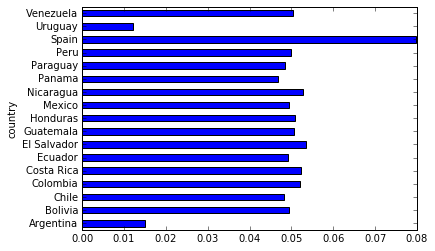

In [20]:
country_test = country_test.sum()/country_test.count()
country_test.plot(kind='barh')

In [24]:
country_test1 = data_new[data_new['test'] == 1].groupby('country')['conversion']
country_test1.describe()

country         
Argentina  count    37377.000000
           mean         0.013725
           std          0.116349
           min          0.000000
           25%          0.000000
           50%          0.000000
           75%          0.000000
           max          1.000000
Bolivia    count     5574.000000
           mean         0.047901
           std          0.213576
           min          0.000000
           25%          0.000000
           50%          0.000000
           75%          0.000000
           max          1.000000
Chile      count     9884.000000
           mean         0.051295
           std          0.220610
           min          0.000000
           25%          0.000000
           50%          0.000000
           75%          0.000000
           max          1.000000
Colombia   count    26972.000000
           mean         0.050571
           std          0.219124
           min          0.000000
           25%          0.000000
           50%          0.

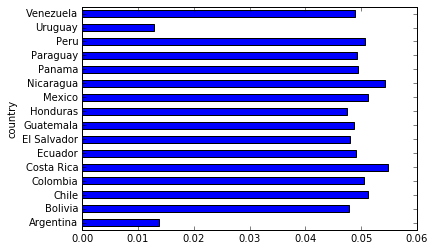

In [25]:
country_test1 = country_test1.sum()/country_test1.count()
country_test1.plot(kind='barh')

Removing Spain since it is not there in both the above.

In [29]:
dataset = data_new.loc[data_new.country != 'Spain']
dataset =dataset.groupby(by='test')
dataset.describe()

age     conversion         user_id
test                                                    
0    count  185311.000000  185311.000000   185311.000000
     mean       27.143186       0.048292   500378.661504
     std         6.788499       0.214383   288943.965717
     min        18.000000       0.000000        1.000000
     25%        22.000000       0.000000   249820.000000
     50%        26.000000       0.000000   501112.000000
     75%        31.000000       0.000000   750509.500000
     max        66.000000       1.000000  1000000.000000
1    count  215774.000000  215774.000000   215774.000000
     mean       27.115236       0.043411   499483.813462
     std         6.762929       0.203781   288529.156089
     min        18.000000       0.000000        3.000000
     25%        22.000000       0.000000   249801.750000
     50%        26.000000       0.000000   499125.000000
     75%        31.000000       0.000000   748968.750000
     max        70.000000       1.000000   999999.000000

## Hypothesis Testing

Our Null hypothesis is that there is no difference between the conversion rates in the test and control groups.

In [39]:
conversion_rate_control = data_new[(data_new['test'] == 0) & (data_new['country'] != 'Spain')]['conversion']
conversion_rate_control.mean()


0.04829179055749524

In [40]:
conversion_rate_test = data_new[(data_new['test'] == 1) & (data_new['country'] != 'Spain')]['conversion']
conversion_rate_test.mean()

0.043411161678422794

In [43]:
data = data_new[data_new['country'] != 'Spain']

In [44]:
freq = pd.crosstab(data['test'], data['conversion'])
chi2,pval,dof,expected = chi2_contingency(freq)

In [45]:
freq

conversion,0,1
test,,
0,176362,8949
1,206407,9367


In [46]:

pval

1.653553456785947e-13

In [47]:

chi2

54.37858181419832

We see a significant difference in the test and control conversion rate and hence reject the null hypothesis.

There could be a couple of reasons why this happens:
1.There was insufficient data collected.
2.There could have been some bias in the experiment which could have caused the selection of people not to be a random process.